In [2]:
import pandas as pd

file_path = "data.csv"
df = pd.read_csv(file_path)

df = df.drop(columns=['Unnamed: 32', 'id'])
# эквивалентно:
# df = df.loc[:, df.columns[10:]]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


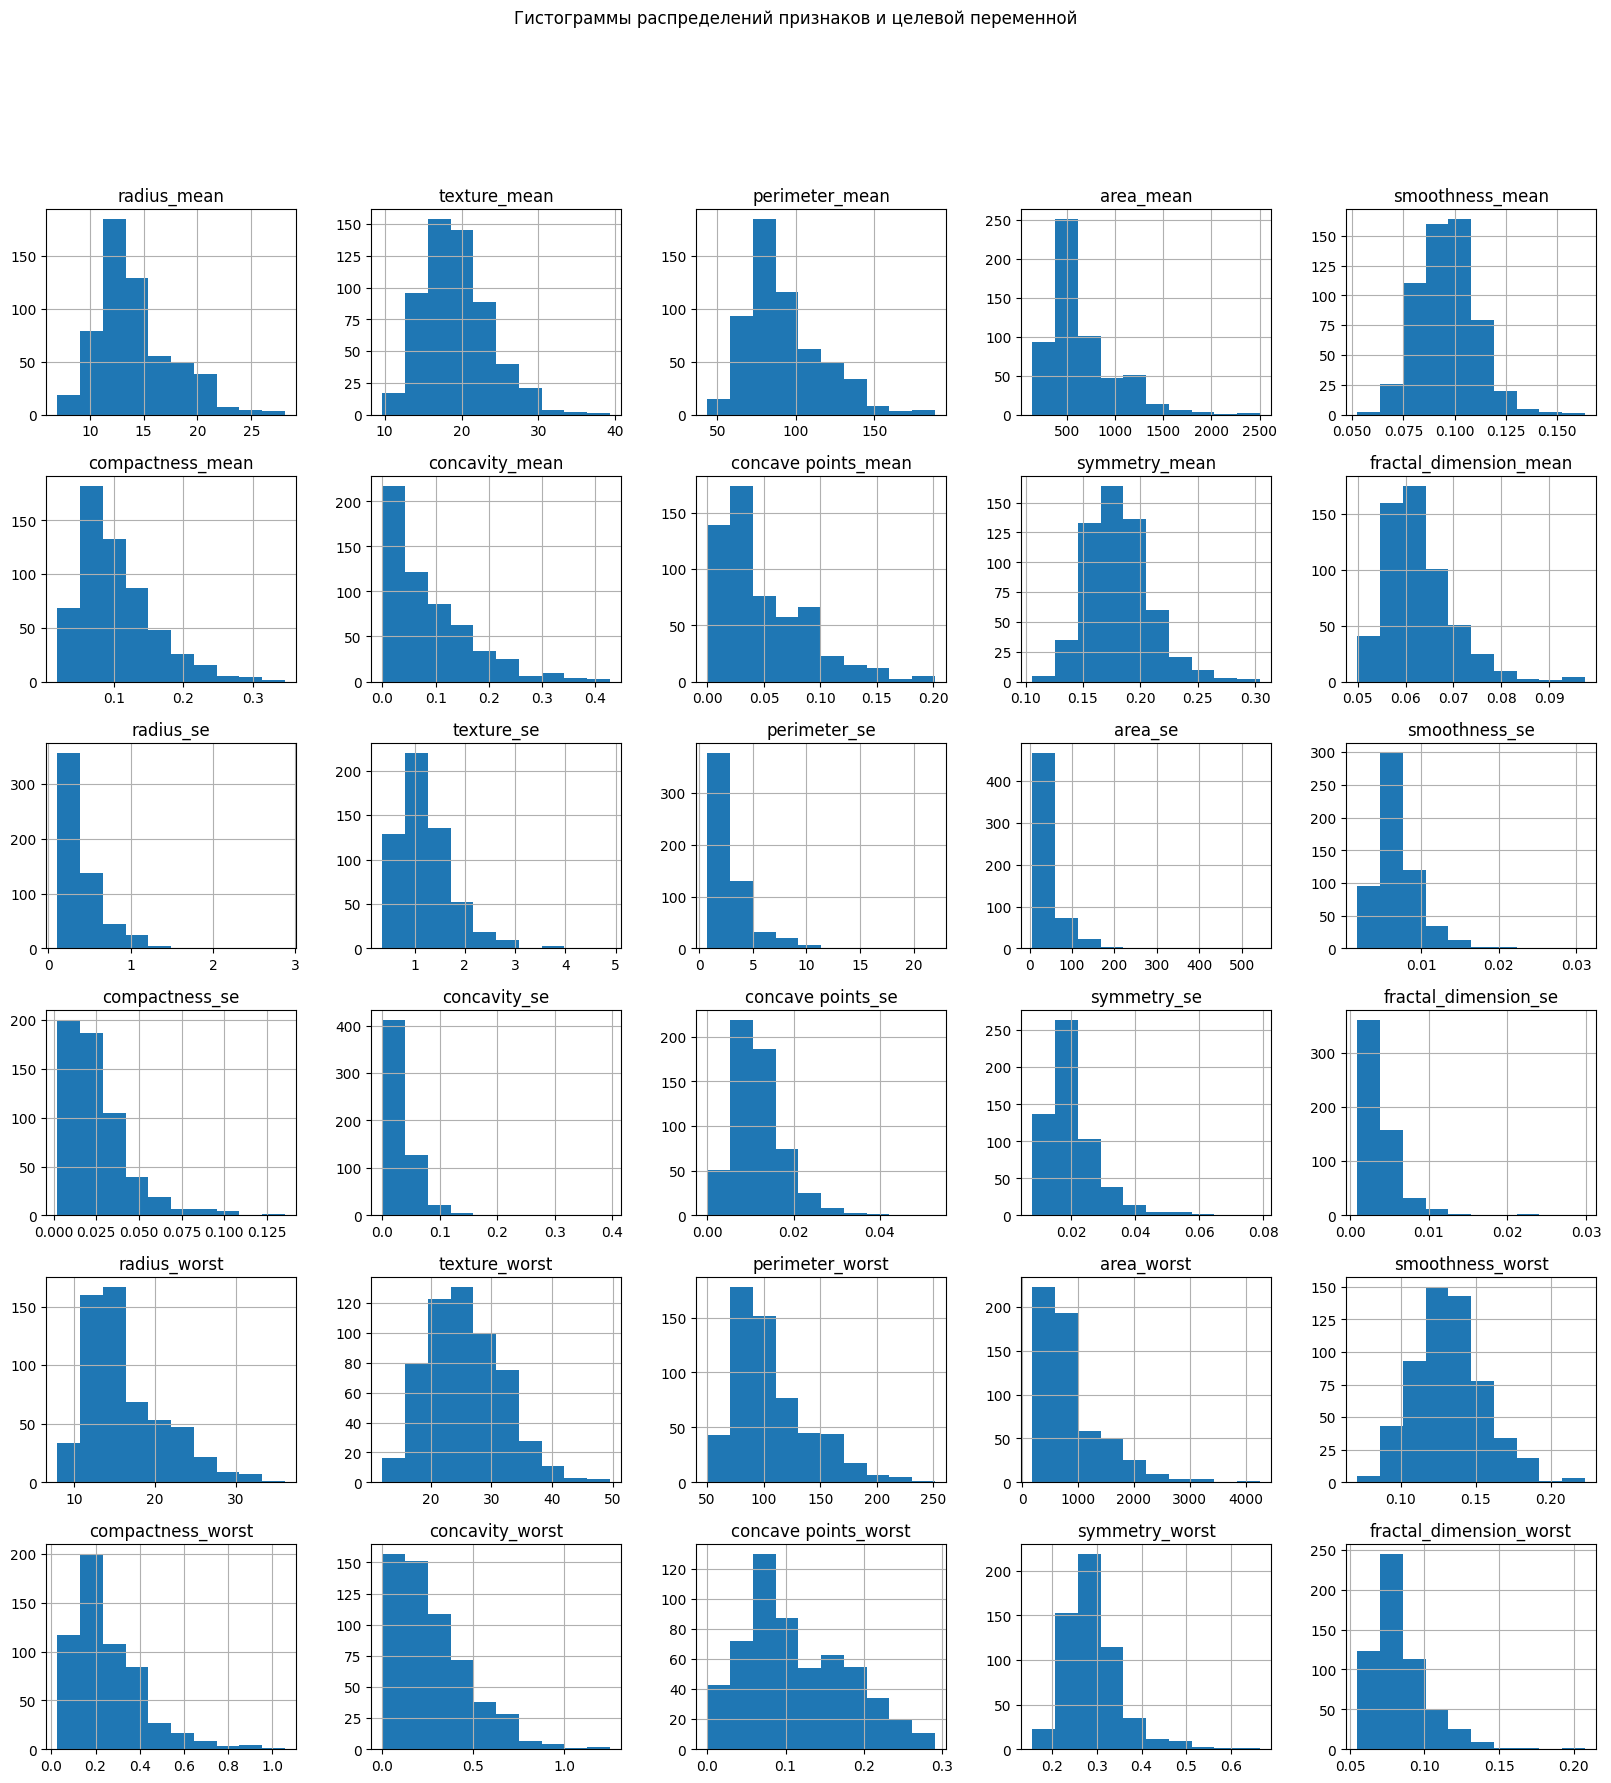

In [4]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(20, 20))
plt.suptitle("Гистограммы распределений признаков и целевой переменной")
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

map_diagnosis = {'M':1, 'B':0}

df['diagnosis'] = df['diagnosis'].map(map_diagnosis)

scaler = StandardScaler()


In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# print(y_test.count())

metrics_dict = {'Model': [], 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1': [], 'ROC_AUC': []}


def build_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B', 'M'])
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap='Blues', colorbar=True)
    ax.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    
    if model_name == "DecisionTree":
        plt.figure(figsize=(24, 12))
        plot_tree(
            model_tree,
            filled=True,
            feature_names=X.columns,
            class_names=['Malignant', 'Benign'],
            fontsize=10
        )
        plt.show()
        
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Recall'].append(recall)
    metrics_dict['Precision'].append(precision)
    metrics_dict['F1'].append(f1)
    metrics_dict['ROC_AUC'].append(roc_auc)
    

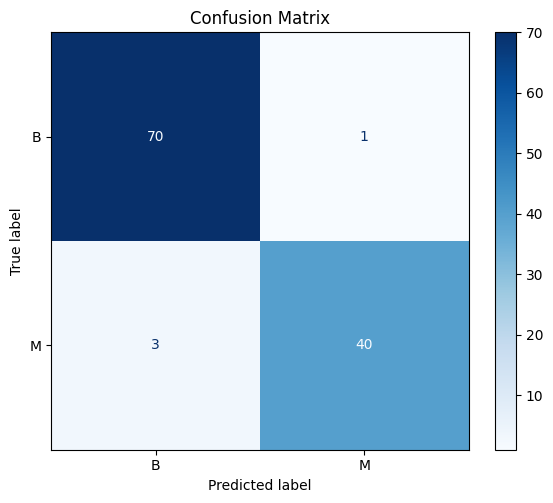

Accuracy:  0.9649122807017544


In [7]:
model_gaussianNB = GaussianNB()
build_model(model_gaussianNB, "GaussianNB")

In [8]:
smoothing = [0, 1, 2, 3, 4, 5]
for sm in smoothing:
    print("var_smoothing  =", sm)
    model = GaussianNB(var_smoothing=sm)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))

var_smoothing  = 0
[[70  1]
 [ 3 40]]
Accuracy:  0.9649122807017544
var_smoothing  = 1
[[71  0]
 [ 7 36]]
Accuracy:  0.9385964912280702
var_smoothing  = 2
[[71  0]
 [11 32]]
Accuracy:  0.9035087719298246
var_smoothing  = 3
[[71  0]
 [13 30]]
Accuracy:  0.8859649122807017
var_smoothing  = 4
[[71  0]
 [14 29]]
Accuracy:  0.8771929824561403
var_smoothing  = 5
[[71  0]
 [15 28]]
Accuracy:  0.868421052631579


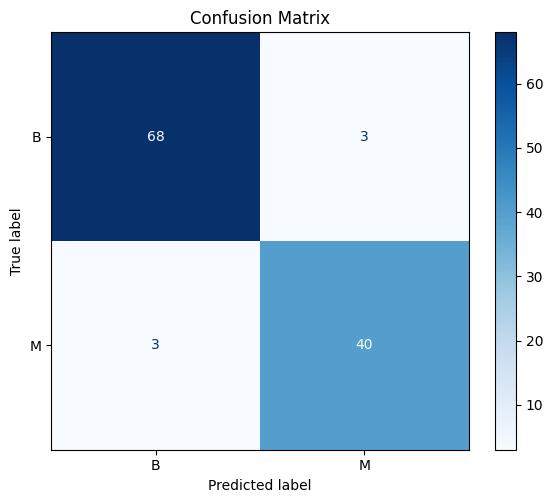

Accuracy:  0.9473684210526315


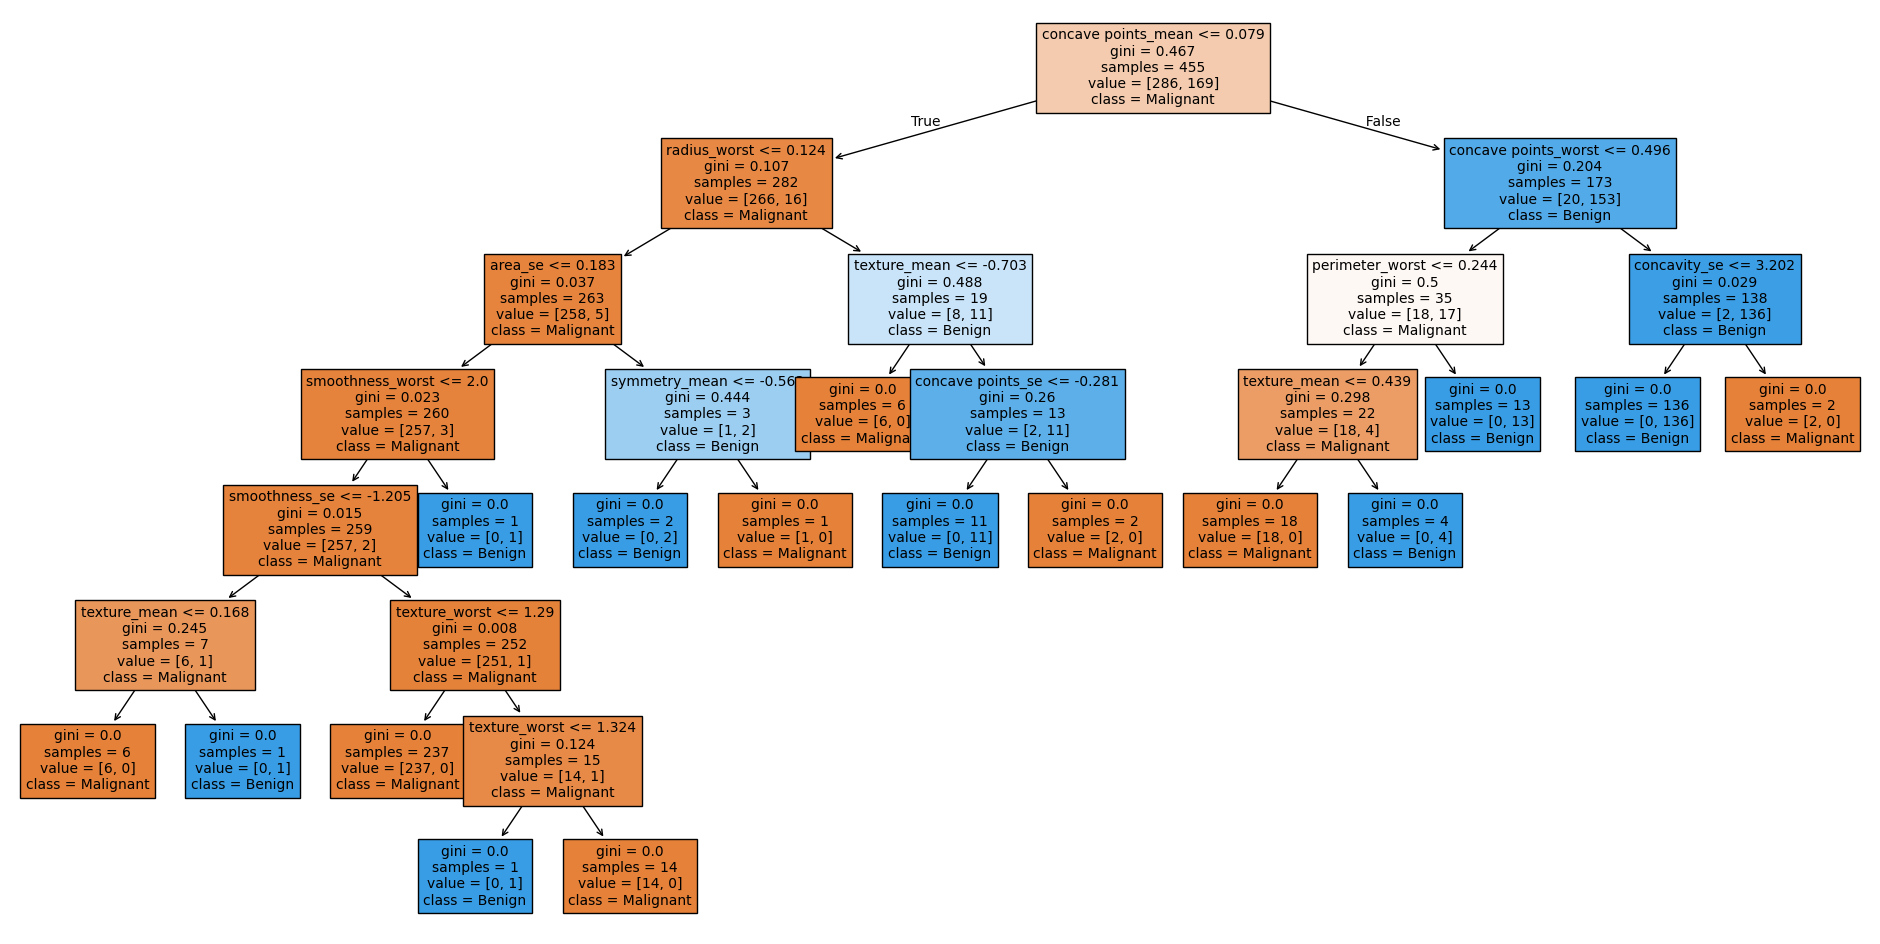

In [9]:
model_tree = DecisionTreeClassifier()
build_model(model_tree, "DecisionTree")


In [10]:
criterion = ['entropy', 'gini']

for cr in criterion:
    for i in range (1,5):
        model = DecisionTreeClassifier(
            criterion=cr, 
            max_depth=i, 
            random_state=42
        )
        print(f"criterion: {cr}, max_depth = {i}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print("Accuracy: ", accuracy_score(y_test, y_pred))

criterion: entropy, max_depth = 1
[[63  8]
 [ 4 39]]
Accuracy:  0.8947368421052632
criterion: entropy, max_depth = 2
[[63  8]
 [ 2 41]]
Accuracy:  0.9122807017543859
criterion: entropy, max_depth = 3
[[71  0]
 [ 4 39]]
Accuracy:  0.9649122807017544
criterion: entropy, max_depth = 4
[[70  1]
 [ 5 38]]
Accuracy:  0.9473684210526315
criterion: gini, max_depth = 1
[[63  8]
 [ 4 39]]
Accuracy:  0.8947368421052632
criterion: gini, max_depth = 2
[[69  2]
 [ 6 37]]
Accuracy:  0.9298245614035088
criterion: gini, max_depth = 3
[[69  2]
 [ 4 39]]
Accuracy:  0.9473684210526315
criterion: gini, max_depth = 4
[[68  3]
 [ 3 40]]
Accuracy:  0.9473684210526315


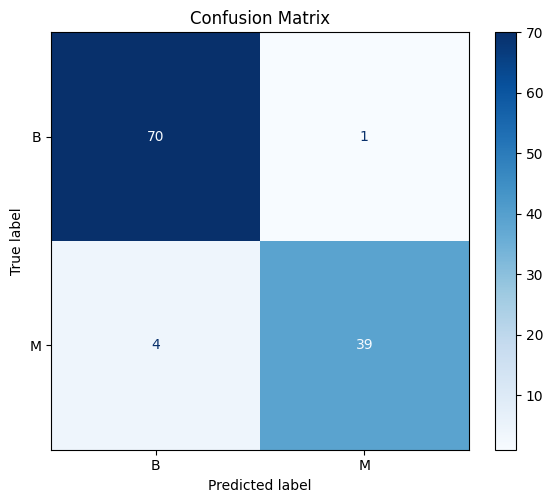

Accuracy:  0.956140350877193


In [11]:
model_lda = LinearDiscriminantAnalysis()
build_model(model_lda, "LDA")

In [12]:
solvers = ['svd', 'lsqr', 'eigen']
shrinkages = [None, 'auto', 0.5] 

for s in solvers:
    for sh in shrinkages:
        if s == 'svd' and sh is not None:
            continue
        model = LinearDiscriminantAnalysis(solver=s, shrinkage=sh)
        print(f"solver: {s}, shrinkage={sh}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print()

solver: svd, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: lsqr, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: lsqr, shrinkage=auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

solver: lsqr, shrinkage=0.5
[[71  0]
 [ 4 39]]
Accuracy: 0.9649122807017544

solver: eigen, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: eigen, shrinkage=auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

solver: eigen, shrinkage=0.5
[[71  0]
 [ 4 39]]
Accuracy: 0.9649122807017544



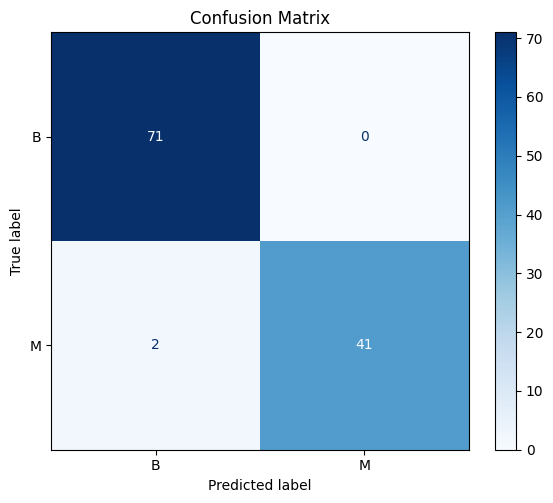

Accuracy:  0.9824561403508771


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model_svc = SVC(
    kernel='rbf',     # тип ядра (функция, задающая форму разделяющей границы)
    C=1.0,            # параметр штрафа за ошибки
    gamma='auto',    # коэффициент ядра (для rbf, poly, sigmoid)
    random_state=42
)

build_model(model_svc, "SVC")




In [14]:
c = [0.5, 1, 2]
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
gamma = ['auto', 'scale']
for i in c:
    for k in kernels:
        for g in gamma:
            if k != 'linear':
                model = SVC(C=i, kernel=k, gamma=g)
                print(f"C = {i}, kernel: {k}, gamma: {g}")
            else: 
                model = SVC(C=i, kernel=k, gamma=g)
                print(f"C = {i}, kernel: {k}")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(confusion_matrix(y_test, y_pred))
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print()

C = 0.5, kernel: rbf, gamma: auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: rbf, gamma: scale
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: linear
[[69  2]
 [ 2 41]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: linear
[[69  2]
 [ 2 41]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: poly, gamma: auto
[[71  0]
 [16 27]]
Accuracy: 0.8596491228070176

C = 0.5, kernel: poly, gamma: scale
[[71  0]
 [16 27]]
Accuracy: 0.8596491228070176

C = 0.5, kernel: sigmoid, gamma: auto
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 0.5, kernel: sigmoid, gamma: scale
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: rbf, gamma: auto
[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771

C = 1, kernel: rbf, gamma: scale
[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771

C = 1, kernel: linear
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: linear
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: poly, gamma: auto
[[71  0]


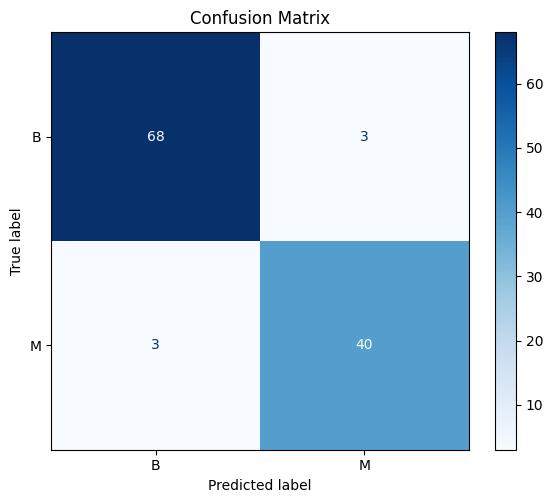

Accuracy:  0.9473684210526315


In [15]:
model_kneighbors = KNeighborsClassifier()
build_model(model_kneighbors, "KNeighbors")

In [16]:
weights = ['uniform', 'distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
neighbors = [5, 10, 15]
for n in neighbors:
    for w in weights:
        for a in algorithms:
            model = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a)
            print(f"n_neighbors: {n}, weights: {w}, algorithm: {a}")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(confusion_matrix(y_test, y_pred))
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print()

n_neighbors: 5, weights: uniform, algorithm: auto
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: ball_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: kd_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: brute
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: auto
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: ball_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: kd_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: brute
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 10, weights: uniform, algorithm: auto
[[69  2]
 [ 3 40]]
Accuracy: 0.956140350877193

n_neighbors: 10, weights: uniform, algorithm: ball_tree
[[69  2]
 [ 3 40]]
Accuracy: 0.

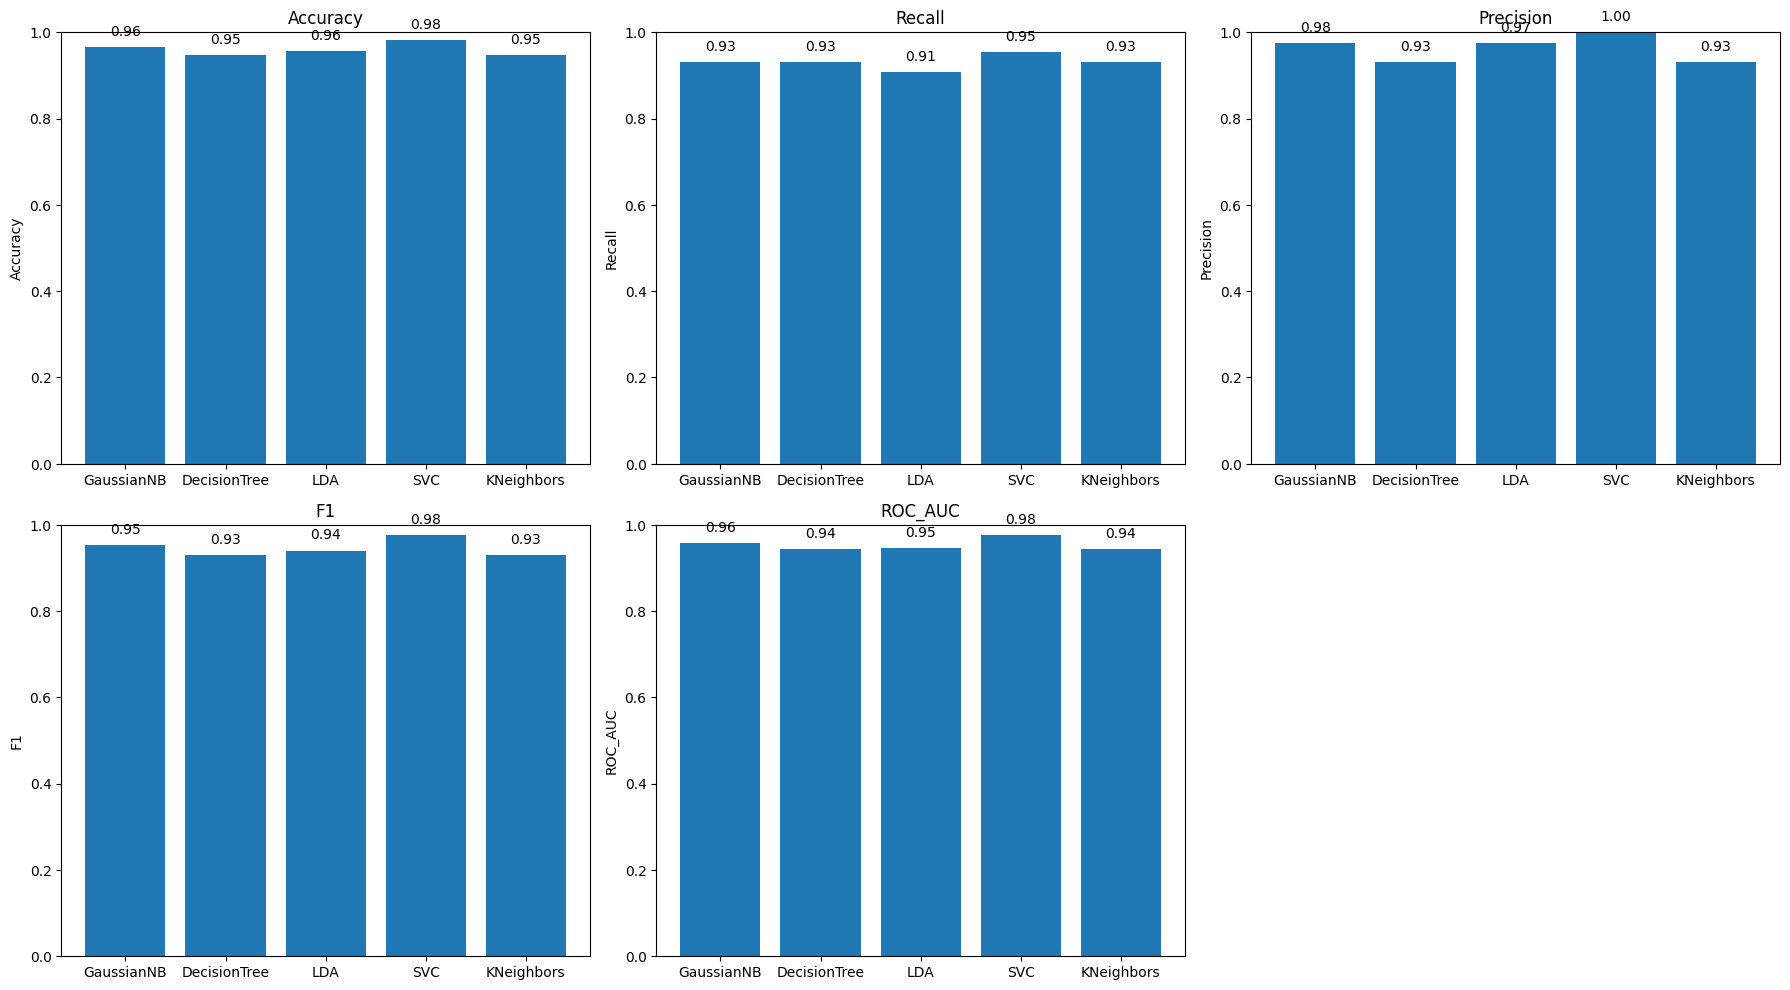

In [17]:
import matplotlib.pyplot as plt

# Преобразуем словарь в DataFrame, если ещё не сделали
metrics_df = pd.DataFrame(metrics_dict)

# Список метрик для отображения
metric_names = ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC']

plt.figure(figsize=(18, 10))

for i, metric in enumerate(metric_names, 1):
    plt.subplot(2, 3, i)
    plt.bar(metrics_df['Model'], metrics_df[metric])
    plt.title(metric)
    plt.ylim(0, 1)  # Метрики от 0 до 1
    # Подписи над столбцами
    for j, val in enumerate(metrics_df[metric]):
        plt.text(j, val + 0.02, f'{val:.2f}', ha='center', va='bottom')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()


Epoch 1/50


c:\Users\Admin\Desktop\7 семестр\машинное обучение\L3_AISystems\venv\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Admin\Desktop\7 семестр\машинное обучение\L3_AISystems\venv\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Admin\Desktop\7 семестр\машинное обучение\L3_AISystems\venv\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\Admin\Desktop\7 семестр\машинное обучение\L3_AISystems\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activit

12/12 - 2s - 165ms/step - accuracy: 0.6264 - auc: 0.5000 - loss: nan - val_accuracy: 0.6374 - val_auc: 0.5000 - val_loss: nan
Epoch 2/50
12/12 - 0s - 13ms/step - accuracy: 0.6264 - auc: 0.5003 - loss: nan - val_accuracy: 0.6374 - val_auc: 0.5000 - val_loss: nan
Epoch 3/50
12/12 - 0s - 12ms/step - accuracy: 0.6264 - auc: 0.5000 - loss: nan - val_accuracy: 0.6374 - val_auc: 0.5000 - val_loss: nan
Epoch 4/50
12/12 - 0s - 14ms/step - accuracy: 0.6264 - auc: 0.4656 - loss: nan - val_accuracy: 0.6374 - val_auc: 0.5000 - val_loss: nan
Epoch 5/50
12/12 - 0s - 13ms/step - accuracy: 0.6264 - auc: 0.5000 - loss: nan - val_accuracy: 0.6374 - val_auc: 0.5000 - val_loss: nan
Epoch 6/50
12/12 - 0s - 13ms/step - accuracy: 0.6264 - auc: 0.5250 - loss: nan - val_accuracy: 0.6374 - val_auc: 0.5000 - val_loss: nan
Epoch 7/50
12/12 - 0s - 13ms/step - accuracy: 0.6264 - auc: 0.5000 - loss: nan - val_accuracy: 0.6374 - val_auc: 0.5000 - val_loss: nan
Epoch 8/50
12/12 - 0s - 13ms/step - accuracy: 0.6264 - auc

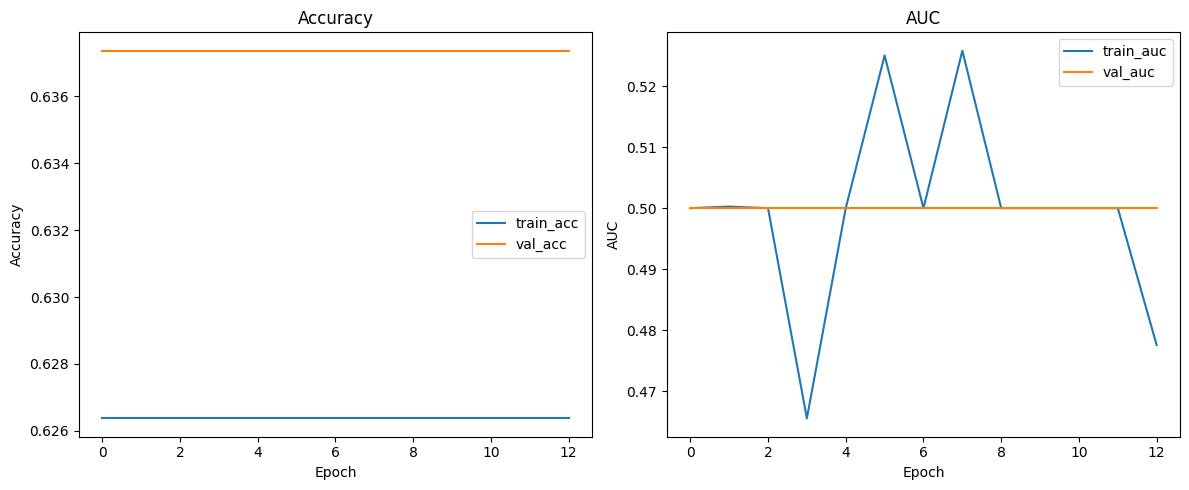

In [22]:
import os
import shutil
from datetime import datetime
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# -----------------------------
# 1️⃣ Подготовка данных
# -----------------------------
# Замените на ваш DataFrame
df = pd.read_csv("data.csv")  # например, "breast_cancer.csv"
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'B': 0, 'M': 1})  # бинарная классификация

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Масштабирование
scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train).astype(np.float32)
X_test_np = scaler.transform(X_test).astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

# -----------------------------
# 2️⃣ Настройка TensorBoard
# -----------------------------


import os

BASE_LOG_DIR = os.path.abspath("C:/ML_logs/logs_tensorboard")
os.makedirs(BASE_LOG_DIR, exist_ok=True)
log_dir = os.path.join(BASE_LOG_DIR, "small_relu")
os.makedirs(log_dir, exist_ok=True)

tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

def run_log_dir(name):
    ts = datetime.now().strftime("%Y%m%d-%H%M%S")
    path = os.path.join(BASE_LOG_DIR, f"{name}_{ts}")
    os.makedirs(path, exist_ok=True)
    return path

# -----------------------------
# 3️⃣ Создание модели
# -----------------------------
def create_model(input_shape, architecture='small', activation='relu', dropout=0.2, l2=0.0001):
    model = models.Sequential()
    
    if architecture == 'small':
        model.add(layers.Dense(32, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2), input_shape=(input_shape,)))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(16, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2)))
    elif architecture == 'medium':
        model.add(layers.Dense(64, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2), input_shape=(input_shape,)))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(32, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2)))
        model.add(layers.Dense(16, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2)))
    else:
        model.add(layers.Dense(128, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2), input_shape=(input_shape,)))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(64, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2)))
        model.add(layers.Dense(32, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2)))
        model.add(layers.Dense(16, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2)))
        
    model.add(layers.Dense(1, activation='sigmoid'))  # бинарная классификация
    return model

# -----------------------------
# 4️⃣ Компиляция и обучение
# -----------------------------
params = {
    'architecture': 'small',
    'activation': 'relu',
    'dropout': 0.2,
    'l2': 0.0001,
    'lr': 0.001,
    'batch_size': 32,
    'epochs': 50,
    'name': 'small_relu'
}

model = create_model(X_train_np.shape[1], architecture=params['architecture'], activation=params['activation'],
                     dropout=params['dropout'], l2=params['l2'])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=params['lr']),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)



es_cb = callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=12, restore_best_weights=True, verbose=1)

# Обучение
history = model.fit(
    X_train_np, y_train_np,
    validation_split=0.2,
    epochs=params['epochs'],
    batch_size=params['batch_size'],
    callbacks=[tb_cb, es_cb],
    verbose=2
)

# -----------------------------
# 5️⃣ Оценка на тесте
# -----------------------------
evals = model.evaluate(X_test_np, y_test_np, verbose=2)
print(f"\nTest Loss: {evals[0]:.4f}, Accuracy: {evals[1]:.4f}, AUC: {evals[2]:.4f}")

# -----------------------------
# 6️⃣ Визуализация истории обучения
# -----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='train_auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.title('AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------
# 7️⃣ Запуск TensorBoard
# -----------------------------
# В терминале:
# tensorboard --logdir logs_tensorboard --port 6006
# Открыть в браузере http://localhost:6006
